In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster_Labels            0
dtype: int64

In [43]:
df.duplicated().sum()

0

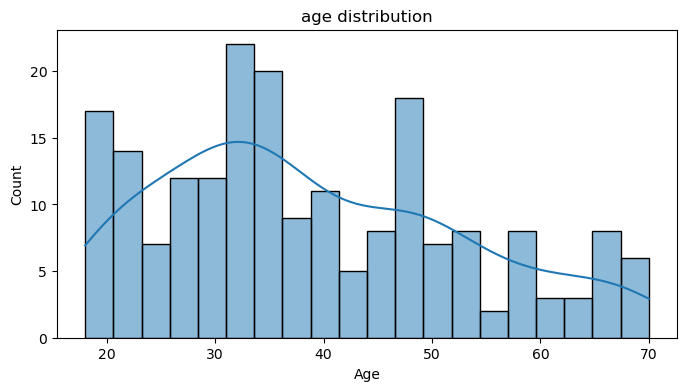

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],kde=True,bins=20)
plt.title('age distribution')
plt.show()

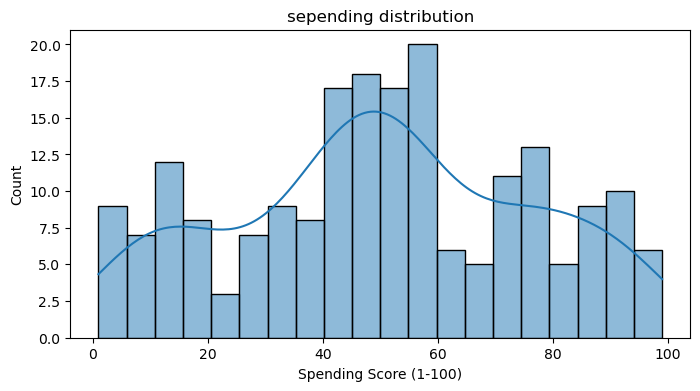

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(df['Spending Score (1-100)'],kde=True,bins=20)
plt.title('sepending distribution')
plt.show()

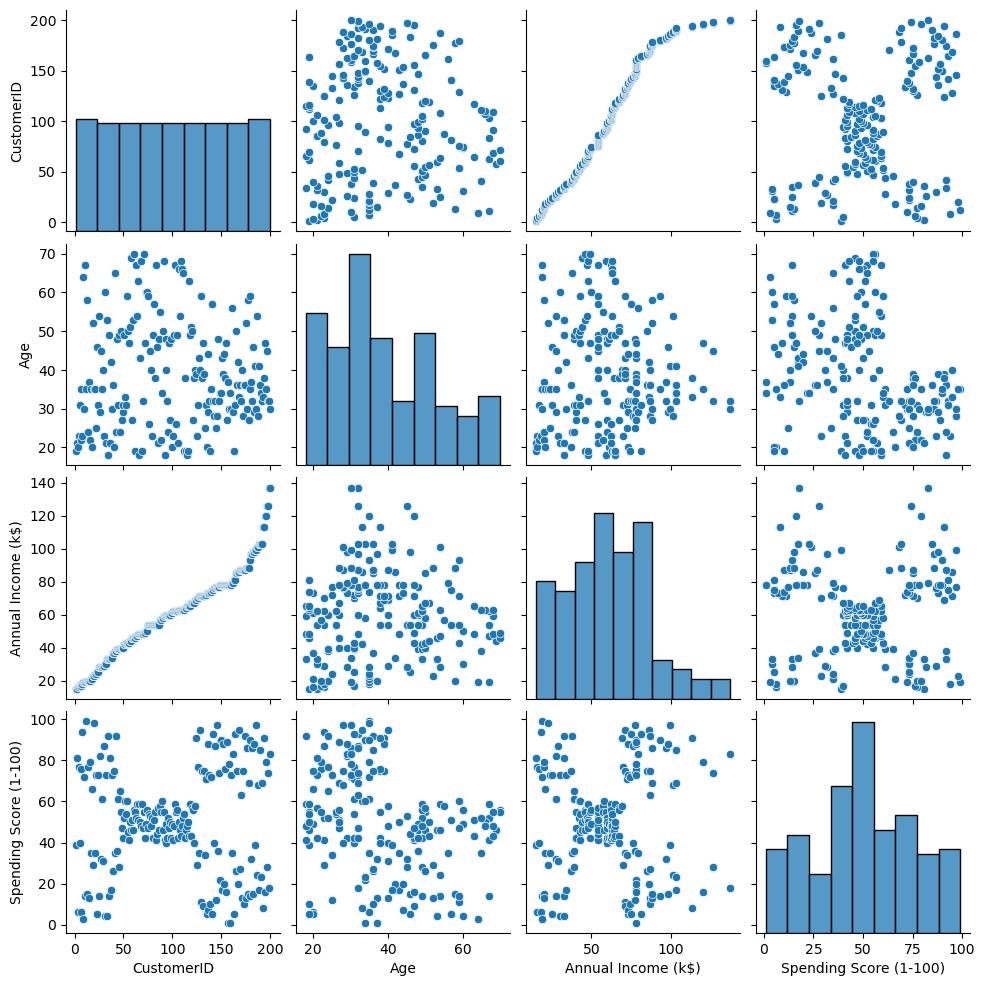

In [7]:
sns.pairplot(df)

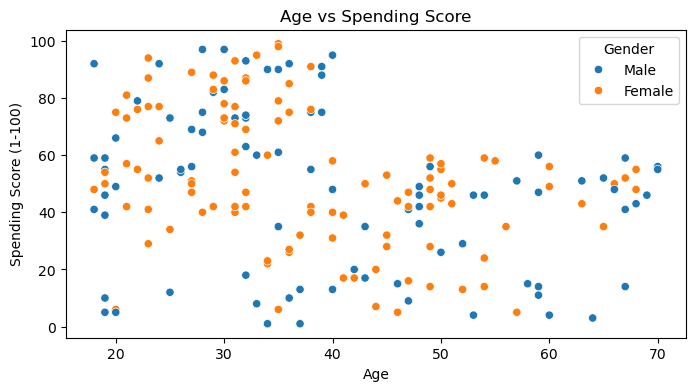

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],hue=df['Gender'])
plt.title('Age vs Spending Score')
plt.show()

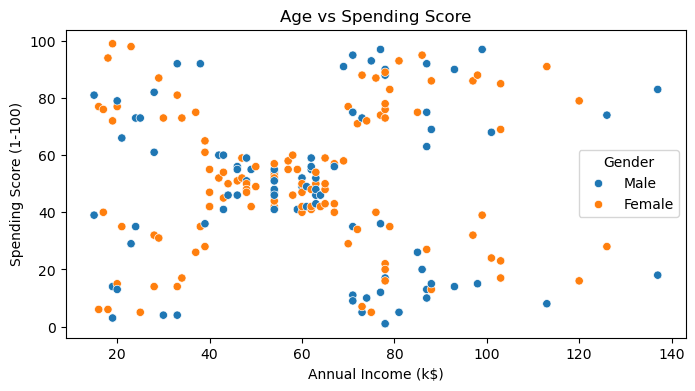

In [47]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Gender'])
plt.title('Age vs Spending Score')
plt.show()

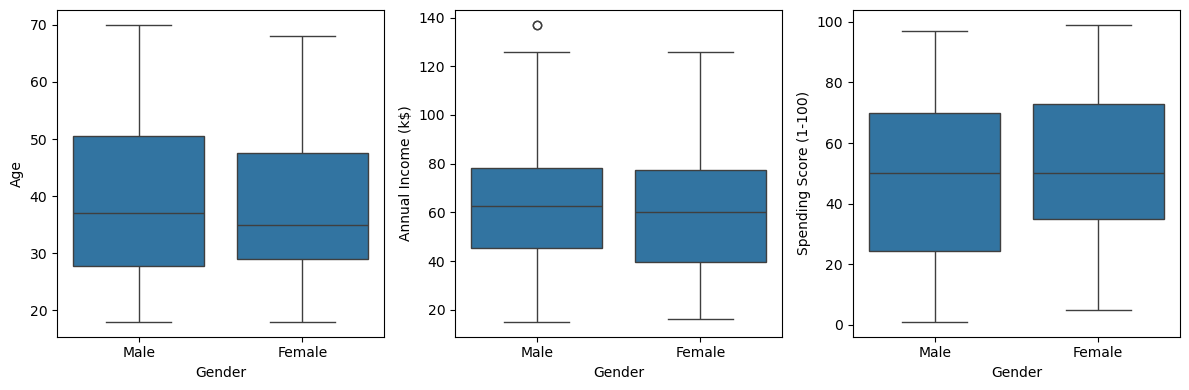

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df)
plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:

scale=StandardScaler()
cols=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cols_scale=scale.fit_transform(cols)

In [53]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})


In [54]:
df['Gender']


0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [8]:
X = df.iloc[:, [3, 4]].values

In [10]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Cost_Function= 269981.28 with 1 Clusters
Cost_Function= 183653.32894736843 with 2 Clusters
Cost_Function= 106348.37306211122 with 3 Clusters
Cost_Function= 73679.78903948836 with 4 Clusters
Cost_Function= 44454.476479679724 with 5 Clusters
Cost_Function= 37455.98455516028 with 6 Clusters
Cost_Function= 35599.01792732462 with 7 Clusters
Cost_Function= 30399.739426493623 with 8 Clusters
Cost_Function= 22900.22615387064 with 9 Clusters
Cost_Function= 20712.434442640693 with 10 Clusters


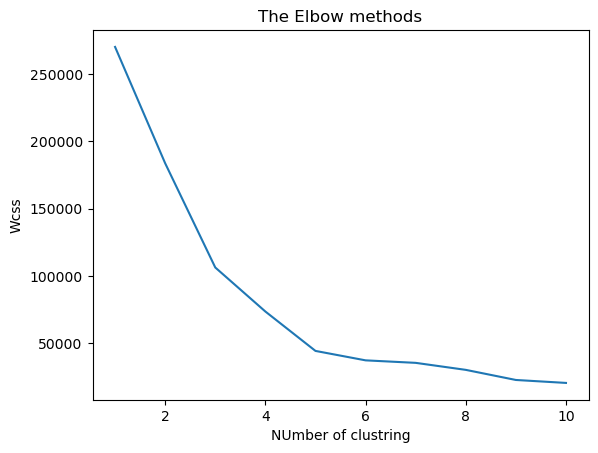

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow methods")
plt.xlabel("NUmber of clustring")
plt.ylabel("Wcss")
plt.show()

In [58]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(X)

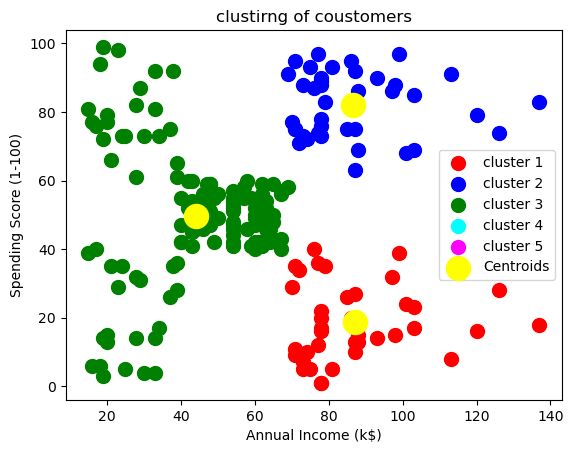

In [59]:
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="Centroids")
plt.title("clustirng of coustomers")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [60]:
df['cluster']=kmeans.fit_predict(cols_scale)
cluster_gender=df.groupby('cluster')['Gender'].value_counts().reset_index()
print(cluster_gender)

   cluster  Gender  count
0        0       1     53
1        0       0     43
2        1       1     22
3        1       0     19
4        2       1     37
5        2       0     26


In [62]:
df.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,50.406250,60.468750,33.343750
1,32.853659,87.341463,79.975610
2,25.142857,43.269841,56.507937


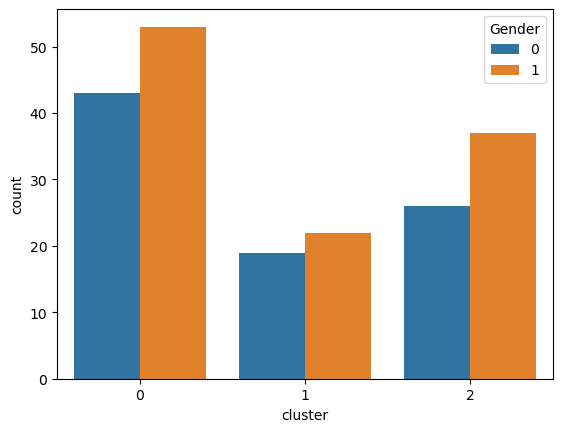

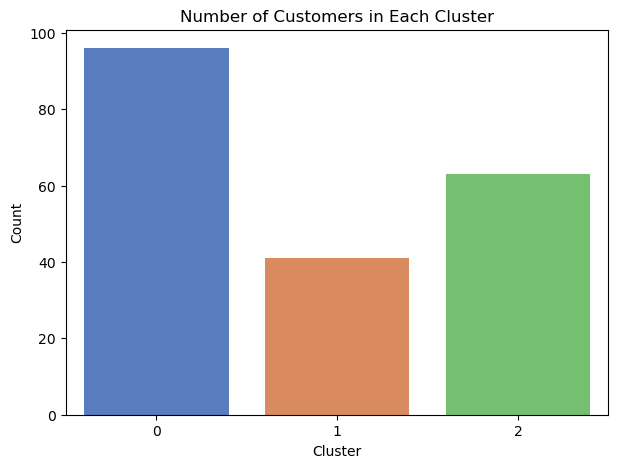

In [63]:
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='muted')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [15]:
from sklearn.neighbors import NearestNeighbors

In [16]:
X = df.iloc[:, [3, 4]].values


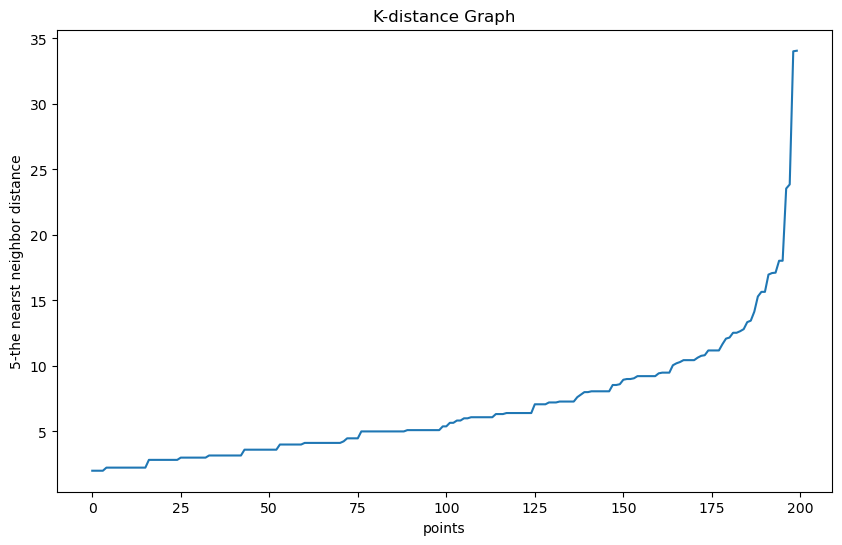

In [17]:
def plot_K_distance(X,K):
    neigh=NearestNeighbors(n_neighbors=K)
    neigh.fit(X)
    distance,_=neigh.kneighbors(X)
    distance=np.sort(distance[:,K-1])
    
    plt.figure(figsize=(10,6))
    plt.plot(distance)
    plt.xlabel("points")
    plt.ylabel(f"{K}-the nearst neighbor distance")
    plt.title('K-distance Graph')
    plt.show()
plot_K_distance(X,K=5)

In [18]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=10,min_samples=3).fit(X)
core_sample=np.zeros_like(dbscan.labels_,dtype=bool)
core_sample[dbscan.core_sample_indices_]
labels=dbscan.labels_
clusters=dbscan.fit_predict(X)

In [19]:
labels


array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [20]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [21]:
from sklearn import metrics

In [22]:
n_cluter=len(set(labels))-(1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
print('Estimated number of clusters: %d' % n_cluter)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 10


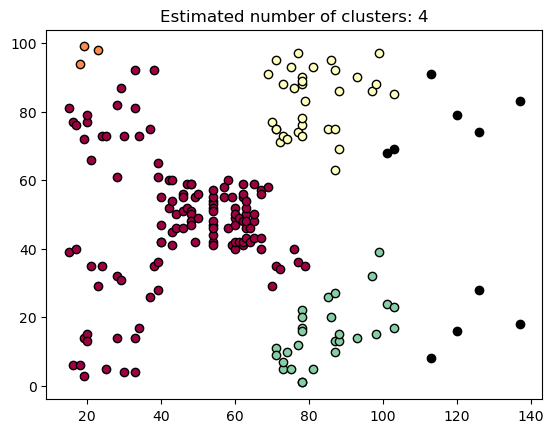

In [24]:


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_sample]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_sample]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_cluter)
plt.show()

In [25]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

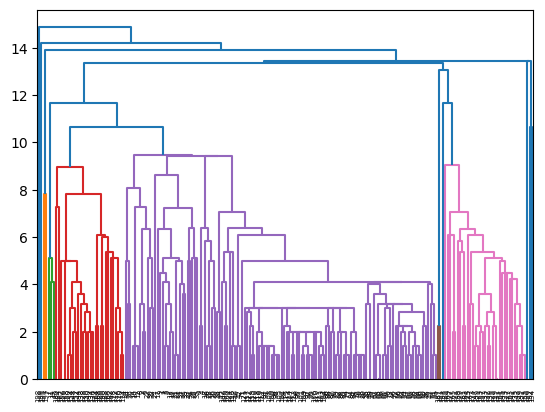

In [26]:
merge=linkage(X,method='single',metric="euclidean")
dendrogram(merge)
plt.show()


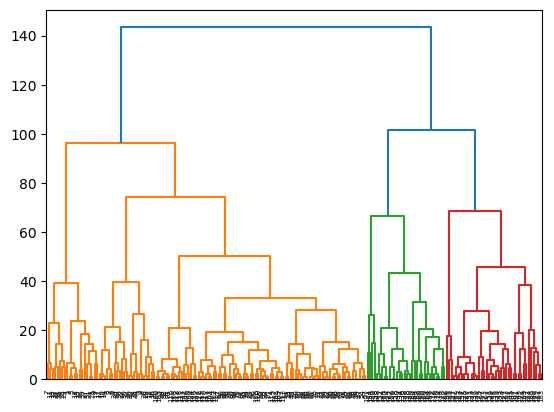

In [27]:
merge=linkage(X,method='complete',metric="euclidean")
dendrogram(merge)
plt.show()

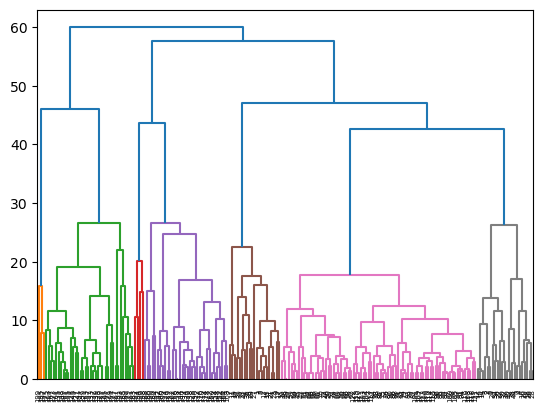

In [28]:
merge=linkage(X,method='average',metric="euclidean")
dendrogram(merge)
plt.show()

In [29]:
cluster_lablel=cut_tree(merge,n_clusters=3).reshape(-1,)
cluster_lablel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

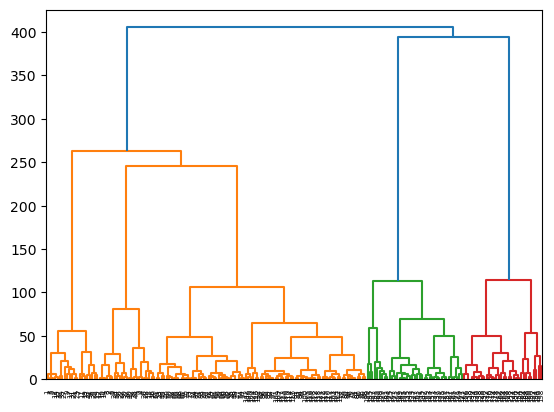

In [30]:
merge=linkage(X,method='ward',metric="euclidean")
dendrogram(merge)
plt.show()

In [31]:
df['Cluster_Labels']=cluster_lablel
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [35]:
from sklearn.metrics import silhouette_score

In [36]:
score=silhouette_score(X,cluster_lablel)
print("sihouette Score",score)

sihouette Score 0.46761358158775435


In [38]:
from sklearn.metrics import calinski_harabasz_score

In [39]:

ch=calinski_harabasz_score(X,cluster_lablel)
print("Calinski-Harabasz Index:", ch)

Calinski-Harabasz Index: 151.5570090006799


In [40]:
from sklearn.metrics import davies_bouldin_score
db=davies_bouldin_score(X,cluster_lablel)
print("davies_bouldin_score: ",db)

davies_bouldin_score:  0.7152768202484618


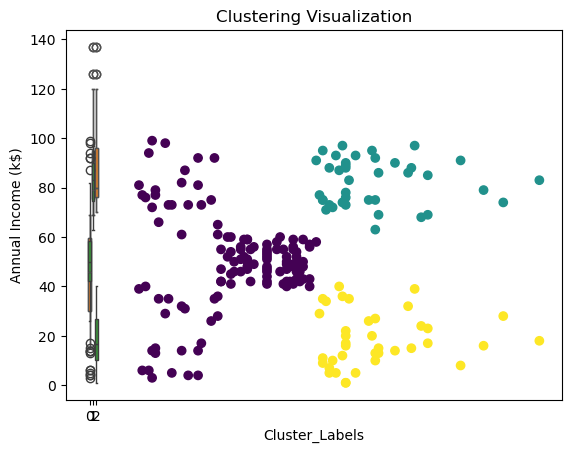

In [41]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=cluster_lablel, cmap='viridis')
plt.title("Clustering Visualization")
plt.show()